# CNN implementation as mentioned in "A deep learning approach for person identification using ear biometrics" paper

### Link to paper: https://doi.org/10.1007/s10489-020-01995-8

In [113]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization as BN, Dense, Rescaling
from tensorflow.keras.models import Sequential

In [11]:
batch_size = 32
img_height, img_width = 180, 50
epochs = 100

In [128]:
train_ds, test_ds = image_dataset_from_directory(
    os.path.join(os.getcwd(), 'structured_data'),
    label_mode='categorical',
    validation_split=0.3,
    subset='both',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1586 files belonging to 221 classes.
Using 1111 files for training.
Using 475 files for validation.


tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.], shape=(221,), dtype=float32)


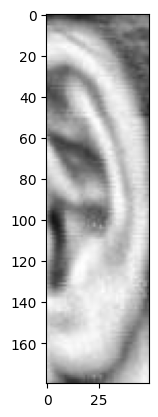

In [129]:
for data, lbl in train_ds.take(1):
    plt.imshow(np.uint64(data[0]))
    print(lbl[0])

In [130]:
model = Sequential()

# Convolution Layer 1
model.add(Rescaling(scale=1./255, input_shape=(180, 50, 3)))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 2
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BN())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 3
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 4
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BN())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 5
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 6
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BN())

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(221, activation='softmax'))

In [131]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 50, 3)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 180, 50, 8)        224       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 90, 25, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 90, 25, 16)        1168      
                                                                 
 batch_normalization_21 (Bat  (None, 90, 25, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 45, 12, 16)     

In [132]:
rmsProp = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsProp, loss='categorical_crossentropy', metrics=['accuracy'])

In [133]:
history = model.fit(train_ds, epochs=epochs) # , validation_data = test_ds)

Epoch 1/100
18/18 [==============================] - 9s 369ms/step - loss: 5.2077 - accuracy: 0.0567
Epoch 2/100
18/18 [==============================] - 6s 338ms/step - loss: 2.8297 - accuracy: 0.3996
Epoch 3/100
18/18 [==============================] - 6s 342ms/step - loss: 1.0449 - accuracy: 0.8155
Epoch 4/100
18/18 [==============================] - 6s 337ms/step - loss: 0.3319 - accuracy: 0.9577
Epoch 5/100
18/18 [==============================] - 6s 338ms/step - loss: 0.2404 - accuracy: 0.9676
Epoch 6/100
18/18 [==============================] - 6s 341ms/step - loss: 0.0782 - accuracy: 0.9901
Epoch 7/100
18/18 [==============================] - 6s 340ms/step - loss: 0.0584 - accuracy: 0.9892
Epoch 8/100
18/18 [==============================] - 6s 339ms/step - loss: 0.0580 - accuracy: 0.9901
Epoch 9/100
18/18 [==============================] - 7s 345ms/step - loss: 0.0468 - accuracy: 0.9946
Epoch 10/100
18/18 [==============================] - 6s 340ms/step - loss: 0.0374 - accura

18/18 [==============================] - 6s 339ms/step - loss: 2.2149e-05 - accuracy: 1.0000
Epoch 79/100
18/18 [==============================] - 6s 344ms/step - loss: 2.4892e-05 - accuracy: 1.0000
Epoch 80/100
18/18 [==============================] - 6s 340ms/step - loss: 2.2183e-05 - accuracy: 1.0000
Epoch 81/100
18/18 [==============================] - 6s 340ms/step - loss: 2.3212e-05 - accuracy: 1.0000
Epoch 82/100
18/18 [==============================] - 6s 338ms/step - loss: 2.1118e-05 - accuracy: 1.0000
Epoch 83/100
18/18 [==============================] - 7s 349ms/step - loss: 2.2236e-05 - accuracy: 1.0000
Epoch 84/100
18/18 [==============================] - 6s 340ms/step - loss: 2.3444e-05 - accuracy: 1.0000
Epoch 85/100
18/18 [==============================] - 6s 340ms/step - loss: 2.2707e-05 - accuracy: 1.0000
Epoch 86/100
18/18 [==============================] - 6s 340ms/step - loss: 2.0304e-05 - accuracy: 1.0000
Epoch 87/100
18/18 [==============================] - 6s 33

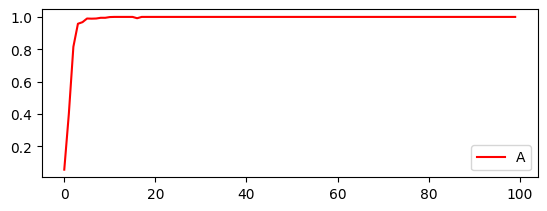

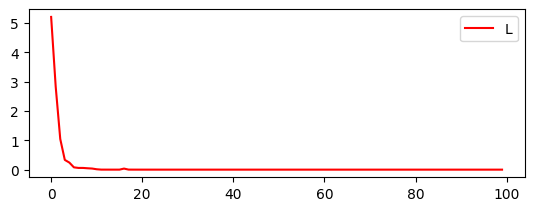

In [134]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'], color='red')
plt.legend('Accuracy')
plt.show()

plt.subplot(2,1,2)
plt.plot(history.history['loss'], color='red')
plt.legend('Loss')
plt.show()

In [135]:
model.evaluate(test_ds)

8/8 [==============================] - 2s 208ms/step - loss: 0.1844 - accuracy: 0.9600


[0.18442653119564056, 0.9599999785423279]

In [123]:
# plt.plot(history.history['accuracy'], color='red')
# plt.plot(history.history['val_accuracy'], color='green')
# plt.legend(['Train Accuracy', 'Validation Accuracy'])